**Importing Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**Downloading the Dataset**

In [5]:
df =pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Analysis of the Data

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [10]:
df.count()

,0
RowNumber,10000
CustomerId,10000
Surname,10000
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000


**Data Preprocessing and cleaning **

Remove Duplicate values

In [11]:
duplicate=df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [12]:
df = df.drop_duplicates()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Handling missing values

In [13]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Drop unnecessary columns

In [14]:
#Drop name and ticket Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.shape

(10000, 11)

Outlier Detection

<Axes: xlabel='Age'>

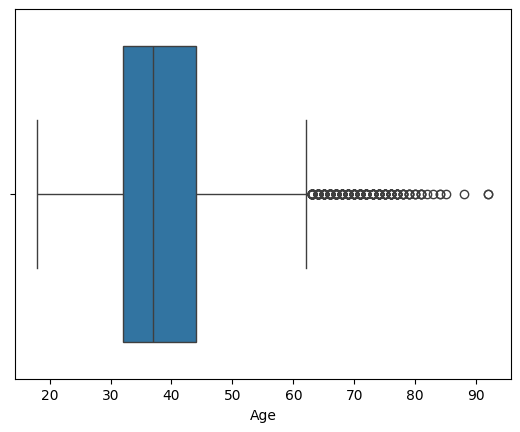

In [17]:
sns.boxplot(x=df['Age'])

In [18]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

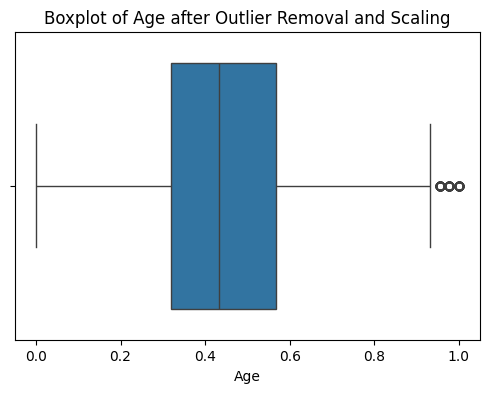

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age after Outlier Removal and Scaling")
plt.show()

<Axes: xlabel='CreditScore'>

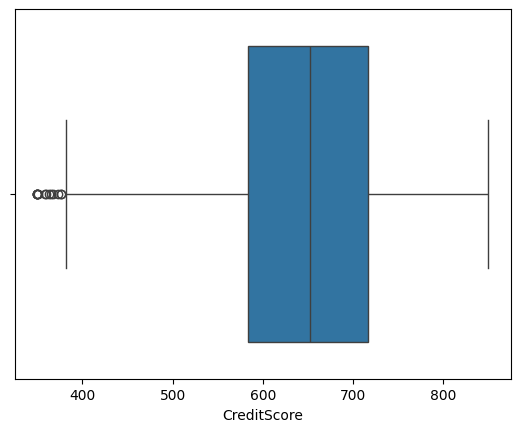

In [21]:
sns.boxplot(x=df['CreditScore'])

In [22]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['CreditScore'] >= lower_bound) & (df['CreditScore'] <= upper_bound)]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])

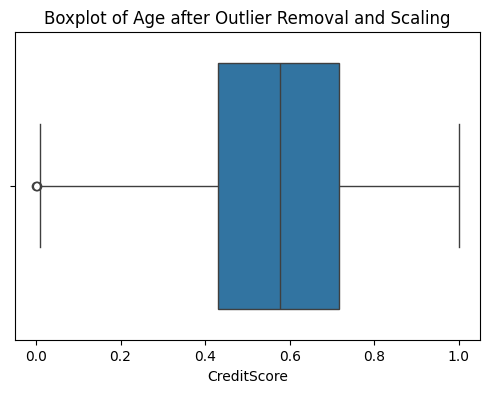

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['CreditScore'])
plt.title("Boxplot of Age after Outlier Removal and Scaling")
plt.show()

<Axes: xlabel='Tenure'>

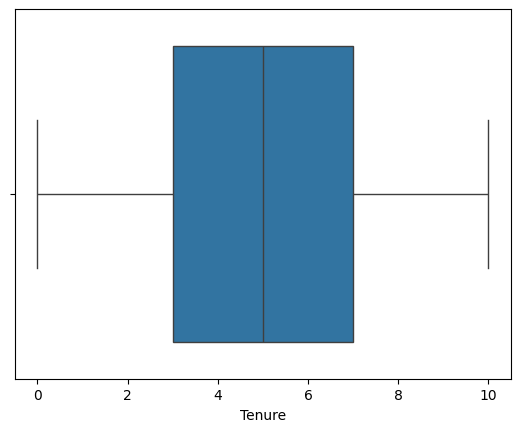

In [25]:
sns.boxplot(x=df['Tenure'])

<Axes: xlabel='Balance'>

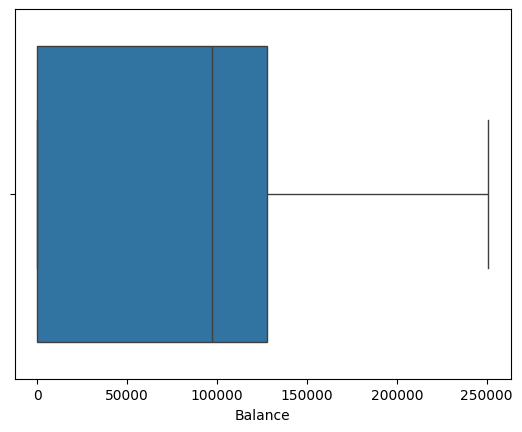

In [26]:
sns.boxplot(x=df['Balance'])


<Axes: xlabel='NumOfProducts'>

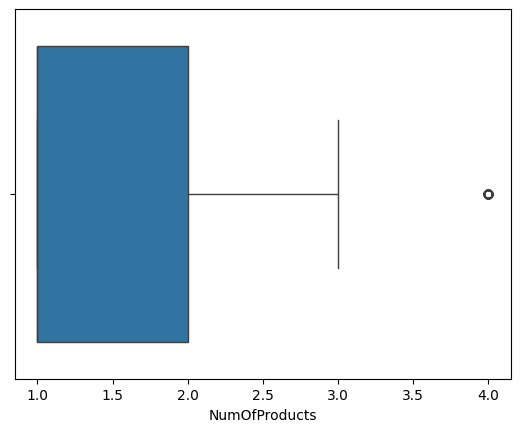

In [27]:
sns.boxplot(x=df['NumOfProducts'])

<Axes: xlabel='EstimatedSalary'>

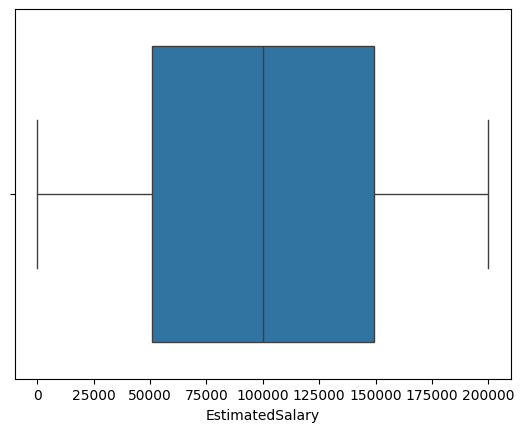

In [28]:
sns.boxplot(x=df['EstimatedSalary'])


Label Encoding

In [29]:
df['Exited'].value_counts() # Checking for the counts for 0 and 1 in the target column which we want to predict
                                # We do this to check that the dataset is imbalanced or not and if it is then we try to manage it by using certain techniques
                                # or by manually manipulating the data

,count
Exited,
0,7677
1,1950


In [30]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Geography'] #0 for france , 1 for  , 2 for spain
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.506410,0,Female,0.545455,2,0.00,1,1,1,101348.88,1
1,0.482906,2,Female,0.522727,1,83807.86,1,0,1,112542.58,0
2,0.256410,0,Female,0.545455,8,159660.80,3,1,0,113931.57,1
3,0.677350,0,Female,0.477273,1,0.00,2,0,0,93826.63,0
4,1.000000,2,Female,0.568182,2,125510.82,1,1,1,79084.10,0


In [32]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender'] #0 for female , 1 for male
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.506410,0,0,0.545455,2,0.00,1,1,1,101348.88,1
1,0.482906,2,0,0.522727,1,83807.86,1,0,1,112542.58,0
2,0.256410,0,0,0.545455,8,159660.80,3,1,0,113931.57,1
3,0.677350,0,0,0.477273,1,0.00,2,0,0,93826.63,0
4,1.000000,2,0,0.568182,2,125510.82,1,1,1,79084.10,0




**Data Visualization:**



Churm distribution with respect to gender

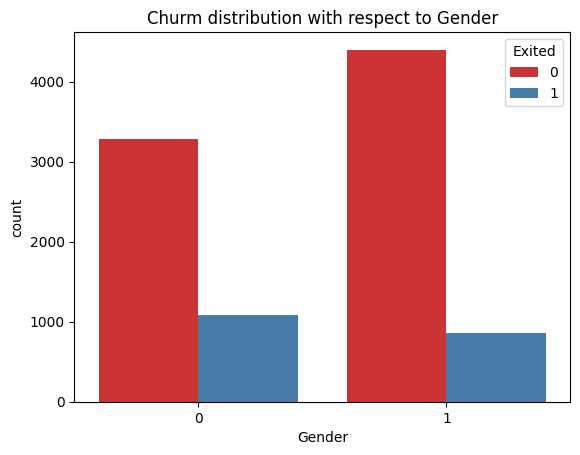

In [34]:
# Survival by Gender
# most of the MALE had Died.
# Most of the FEMALE had Survived.
sns.countplot(data=df,x="Gender",hue="Exited",palette="Set1") # 0=Female , 1=Male
plt.title("Churm distribution with respect to Gender")
plt.show()

Churm distribution with rescpect to tenure

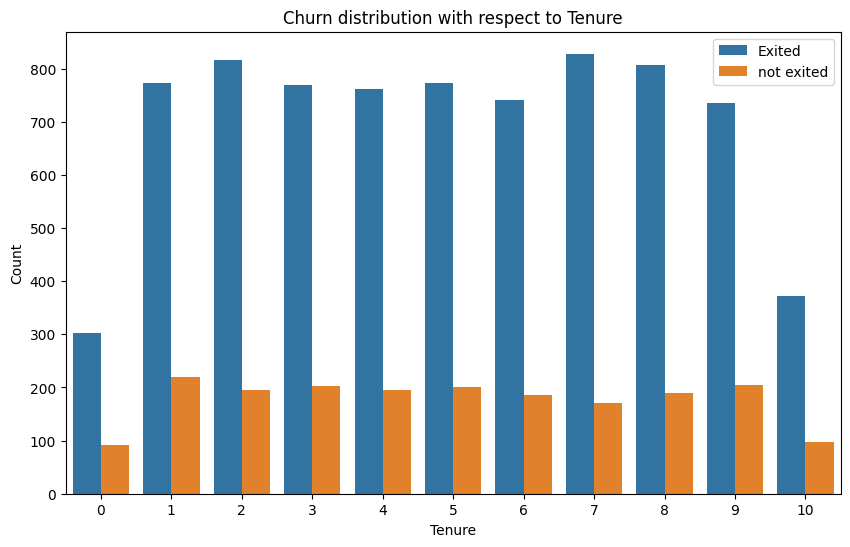

In [35]:
import matplotlib.pyplot as pit
import seaborn as sns

# Create figure and axis
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title("Churn distribution with respect to Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(labels= ["Exited", "not exited"])
plt.show()

Churm Distribution with respect to Age

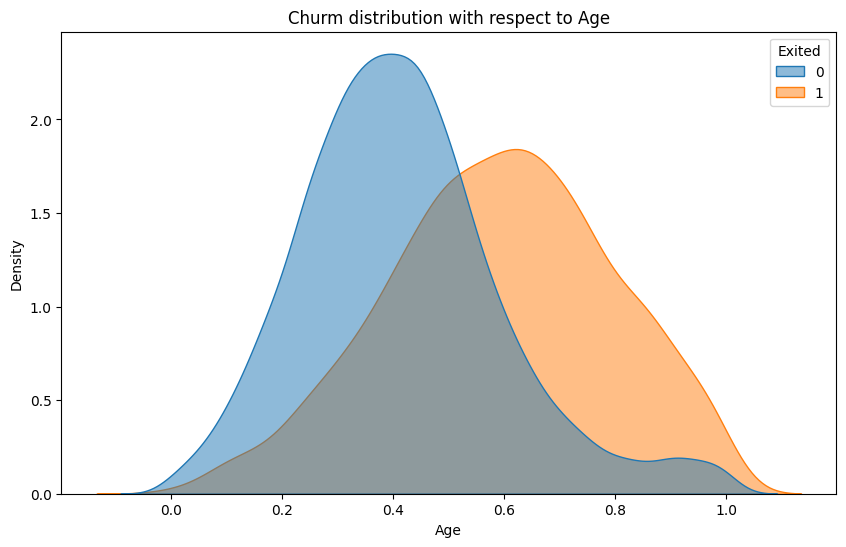

In [36]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True, common_norm=False, alpha=0.5)
plt.title("Churm distribution with respect to Age")
plt.xlabel("Age")
plt.show()

Spliting the data for training and testing

In [37]:
x=df.drop('Exited', axis=1)
y=df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=400)

**Machine Learning Model Evaluation**

1,KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.778816199376947


In [39]:
print(classification_report(y_test, predicted_y))


              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1515
           1       0.32      0.03      0.06       411

    accuracy                           0.78      1926
   macro avg       0.55      0.51      0.47      1926
weighted avg       0.69      0.78      0.70      1926



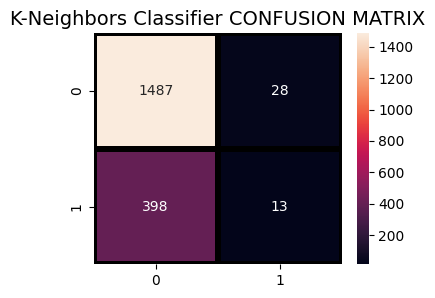

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("K-Neighbors Classifier CONFUSION MATRIX",fontsize=14)
plt.show()

In [41]:
import joblib

joblib.dump(knn_model, "knn_model.pkl")

['knn_model.pkl']

2, Random Forest

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier (random_state = 1)
rf_model.fit(x_train,y_train)
rf_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Random Forest accuracy is :",accuracy_svc)

Random Forest accuracy is : 0.8582554517133957


In [43]:
print(classification_report(y_test, rf_predict_y))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1515
           1       0.79      0.45      0.58       411

    accuracy                           0.86      1926
   macro avg       0.83      0.71      0.75      1926
weighted avg       0.85      0.86      0.84      1926



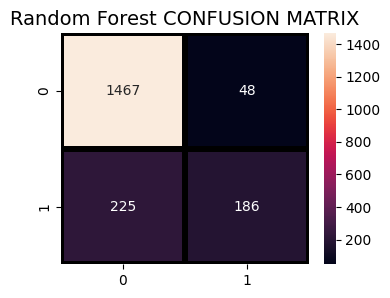

In [44]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest CONFUSION MATRIX",fontsize=14)
plt.show()

In [45]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

3,SVc

In [46]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7866043613707165


In [47]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1515
           1       0.00      0.00      0.00       411

    accuracy                           0.79      1926
   macro avg       0.39      0.50      0.44      1926
weighted avg       0.62      0.79      0.69      1926



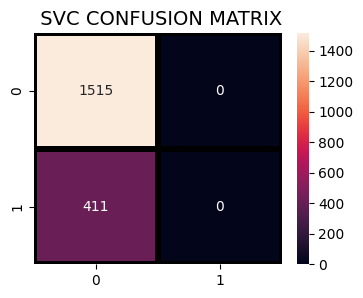

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" SVC CONFUSION MATRIX",fontsize=14)
plt.show()

In [49]:
import joblib

joblib.dump(svc_model, "svc_model.pkl")

['svc_model.pkl']

4, Decision Tree


In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier (random_state = 1)
dt_model.fit(x_train,y_train)
dt_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_svc)

Decision Tree accuracy is : 0.8582554517133957


In [51]:
print(classification_report(y_test, dt_predict_y))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1515
           1       0.79      0.45      0.58       411

    accuracy                           0.86      1926
   macro avg       0.83      0.71      0.75      1926
weighted avg       0.85      0.86      0.84      1926



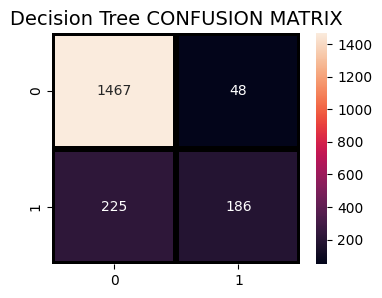

In [52]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Decision Tree CONFUSION MATRIX",fontsize=14)
plt.show()

In [53]:
import joblib

joblib.dump(dt_model, "dt_model.pkl")

['dt_model.pkl']

5, Logistic Regression


In [54]:

lr_model =LogisticRegression(random_state = 1)
lr_model.fit(x_train,y_train)
lr_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Logistic Regression  accuracy is :",accuracy_svc)

Logistic Regression  accuracy is : 0.8582554517133957


In [55]:
print(classification_report(y_test, lr_predict_y))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1515
           1       0.79      0.45      0.58       411

    accuracy                           0.86      1926
   macro avg       0.83      0.71      0.75      1926
weighted avg       0.85      0.86      0.84      1926



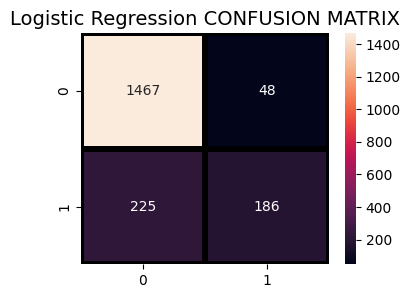

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Logistic Regression CONFUSION MATRIX",fontsize=14)
plt.show()

In [57]:
import joblib

joblib.dump(lr_model, "lr_model.pkl")

['lr_model.pkl']

Prediction on Unseen data

In [58]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [63]:
import joblib
import pandas as pd
model_files = {
    "SVC": "/content/svc_model.pkl",
    "Logistic Regression": "/content/lr_model.pkl",
    "KNN": "/content/knn_model.pkl",
    "Decision Tree": "/content/dt_model.pkl",
    "Random Forest": "/content/rf_model.pkl"
}

models = {}

print(" Loading all models...")
for name, path in model_files.items():
    models[name] = joblib.load(path)
    print(f" Loaded: {name}")

while True:
    print("\nEnter customer data:")

    try:
        data = {
            'CreditScore': float(input("CreditScore: ")),
            'Geography': int(input("Geography (0=France, 1=Germany, 2=Spain): ")),
            'Gender': int(input("Gender (0=Female, 1=Male): ")),
            'Age': float(input("Age: ")),
            'Tenure': float(input("Tenure: ")),
            'Balance': float(input("Balance: ")),
            'NumOfProducts': float(input("NumOfProducts: ")),
            'HasCrCard': float(input("HasCrCard (1=Yes, 0=No): ")),
            'IsActiveMember': float(input("IsActiveMember (1=Yes, 0=No): ")),
            'EstimatedSalary': float(input("EstimatedSalary: "))
        }
    except ValueError:
        print(" Invalid input. Enter numbers only.")
        continue


    input_df = pd.DataFrame([data])

    print("\n Predictions from all models:\n")

    for name, model in models.items():
        prediction = model.predict(input_df)[0]
        result = "Churn " if prediction == 1 else "Stay "
        print(f"{name}: {result}")

    again = input("\nPredict another customer? (yes/no): ").lower()
    if again not in ['yes', 'y']:
        print("👋 Goodbye!")
        break

 Loading all models...
 Loaded: SVC
 Loaded: Logistic Regression
 Loaded: KNN
 Loaded: Decision Tree
 Loaded: Random Forest

Enter customer data:
CreditScore: 600
Geography (0=France, 1=Germany, 2=Spain): 1
Gender (0=Female, 1=Male): 0
Age: 20
Tenure: 5
Balance: 120000
NumOfProducts: 2
HasCrCard (1=Yes, 0=No): 1
IsActiveMember (1=Yes, 0=No): 0
EstimatedSalary: 50000

 Predictions from all models:

SVC: Stay 
Logistic Regression: Stay 
KNN: Stay 
Decision Tree: Stay 
Random Forest: Churn 

Predict another customer? (yes/no): no
👋 Goodbye!
